In [2]:
%pip install unidecode


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
%pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.0/24.0 MB 62.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 65.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 59.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

#import unidecode

https://www.thebarentsobserver.com/security/russian-jamming-is-now-messing-up-gps-signals-for-norwegian-aviation-practically-every-day/163663
https://www.thebarentsobserver.com/security/intensified-gps-jamming-is-side-effect-of-russias-selfprotection-of-kola-bases/166119
https://www.thebarentsobserver.com/news/we-were-spoofed-on-approaching-kirkenes-today/423323


In [10]:
airports_df=pd.read_csv(r'https://raw.githubusercontent.com/jpatokal/openflights/refs/heads/master/data/airports.dat',
                        header=None,
                        names=['no','airport_name','city','country','iata','icao','lat','lon','altitude','something','something2','region','type','source'],
                        na_values='\\N',
                        on_bad_lines='warn')

> GPS jamming reports are coming from pilots on the airliners SAS, Norwegian and Widerøe as well as civilian air ambulances flying in and out of Kirkenes airport and the smaller airports along the coast of Finnmark, like Vadsø, Vardø, Båtsfjord, Berlevåg and Mehamn.

In [17]:
airports_df.query("airport_name.str.contains('Kirkenes|Vadsø|Vardø|Båtsfjord|Berlevåg|Mehamn')")

,no,airport_name,city,country,iata,icao,lat,lon,altitude,something,something2,region,type,source
628,637,Båtsfjord Airport,Batsfjord,Norway,BJF,ENBS,70.600502,29.691401,490,1.0,E,Europe/Oslo,airport,OurAirports
640,649,Kirkenes Airport (Høybuktmoen),Kirkenes,Norway,KKN,ENKR,69.725800,29.891300,283,1.0,E,Europe/Oslo,airport,OurAirports
4062,4327,Mehamn Airport,Mehamn,Norway,MEH,ENMH,71.029701,27.826700,39,1.0,E,Europe/Oslo,airport,OurAirports
4063,4328,Vadsø Airport,Vadsø,Norway,VDS,ENVD,70.065300,29.844700,127,1.0,E,Europe/Oslo,airport,OurAirports
4080,4350,Berlevåg Airport,Berlevag,Norway,BVG,ENBV,70.871399,29.034201,42,1.0,E,Europe/Oslo,airport,OurAirports
4294,5589,"Vardø Airport, Svartnes",Vardø,Norway,VAW,ENSS,70.355400,31.044901,42,1.0,E,Europe/Oslo,airport,OurAirports


In [21]:
world = geopandas.read_file("https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_0_countries.zip").clip([3, 53, 42, 72]).dropna(axis='columns',how='all')

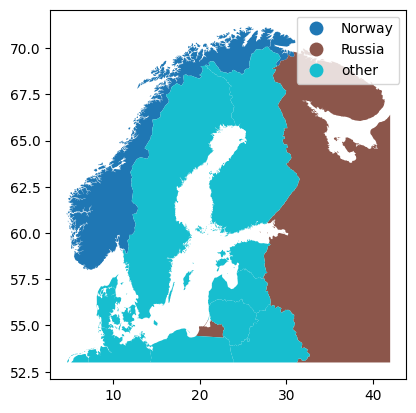

In [24]:
ax = (world
 .assign(
     colour= world.SOVEREIGNT.where(world.SOVEREIGNT.str.match('Norway') | world.SOVEREIGNT.str.match('Russia'),'other')
 )
).plot(column='colour',legend=True)
plt.show()